#1) Импорт библиотек

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2) Загружаем данные

In [6]:
google_price = pd.read_csv("/content/drive/MyDrive/Colab_Main/timeSeries/google_price.csv")
google_price = google_price.drop(columns=['Unnamed: 0'])
tesla_price = pd.read_csv("/content/drive/MyDrive/Colab_Main/timeSeries/tesla_price.csv")
tesla_price = tesla_price.drop(columns=['Unnamed: 0'])
sent_ds = pd.read_csv("/content/drive/MyDrive/Colab_Main/timeSeries/finbert_DS.csv")
sent_ds = sent_ds.drop(columns=['Unnamed: 0'])

google_ds = sent_ds[sent_ds['ticker'] == 'GOOGL']
google_ds = google_ds.reset_index()
google_ds = google_ds.drop(columns=['index'])

tesla_ds = sent_ds[sent_ds['ticker'] == 'TSLA']
tesla_ds = tesla_ds.reset_index()
tesla_ds = tesla_ds.drop(columns=['index'])

### Таблицы котировок бумаг GOOGL и TSLA

Таблицы были загружены с использованием python библиотеки yfinance (https://pypi.org/project/yfinance/)

In [ ]:
google_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,312.732727,313.002991,310.290375,310.290375,310.290375,2438065
1,2010-01-04,314.033997,315.059967,312.422424,313.678650,313.678650,3912135
2,2010-01-05,314.224182,314.224182,311.071106,312.297302,312.297302,6009890
3,2010-01-06,312.842834,313.233215,303.473755,304.424683,304.424683,7953549
4,2010-01-07,304.930176,305.295532,296.612122,297.337830,297.337830,12823614
...,...,...,...,...,...,...,...
3003,2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,2863.100098,1530905
3004,2021-12-07,2911.929932,2950.623291,2904.550049,2945.389893,2945.389893,1612015
3005,2021-12-08,2951.929932,2967.860107,2928.120117,2963.729980,2963.729980,1182594
3006,2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,2952.770020,1139828


In [ ]:
tesla_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18783276
1,2010-06-30,25.959999,30.419201,23.299999,23.830000,23.830000,17194394
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8216789
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5135795
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6852634
...,...,...,...,...,...,...,...
2880,2021-12-06,1001.510010,1021.640015,950.500000,1009.010010,1009.010010,27221037
2881,2021-12-07,1044.199951,1057.673950,1026.810059,1051.750000,1051.750000,18694857
2882,2021-12-08,1052.709961,1072.380005,1033.000122,1068.959961,1068.959961,13968790
2883,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19446486


### Анализ сантиментов новостного фона для бумаг GOOGL и TSLA

Исходный датасет новостей был скачан с kaggle по ссылке:
https://www.kaggle.com/gennadiyr/us-equities-news-data



Анализ сантиментов проводили с использованием классификатора finBERT, обученного на англоязычной моделе эмбеддинга BERT.
Модель finBERT можно загрузить из библиотеки Transformers (Hugging Face):
https://huggingface.co/yiyanghkust/finbert-tone

В модель классификатора передается текст новости. Этот текст подвергается препроцессингу и токенизации. Далее тензор токенов передается в модель которая выдает 3-х мерный вектор действительных чисел от -15 до 15. Где измерение вектора это значение нейтрального, позитивного и негативного компонента новости.
Код вычисления сантиментов новостей находится в файле (finbert_sentiment.py) репозитория (https://github.com/a1exsan/news_sentiment_finbert/blob/dev/finbert_sentiment.py)

Ниже представлена результирующая таблица со столбцами анализа тона содержания новостей и заголовков GOOGL & TSLA:

In [ ]:
sent_ds

,ticker,title,category,date,provider,content_neu,content_pos,content_neg,title_neu,title_pos,title_neg
0,TSLA,Tesla TSLA Expected To Beat Earnings Estimat...,opinion,2020-01-22,Zacks Investment Research,-3.342101,3.363005,-0.810765,-6.131671,9.234274,-7.225535
1,TSLA,What s The Right Valuation Multiple For Tesla,opinion,2020-01-22,Zacks Investment Research,-2.808478,2.342841,0.417846,5.341782,-6.214518,-3.542737
2,TSLA,Tesla NIO And The Electric Boogie,opinion,2020-01-22,Zacks Investment Research,2.970929,-2.891362,-2.498408,5.373095,-6.870000,-2.244646
3,TSLA,Toyota TM Recalls 3 4M Vehicles Worldwide Ov...,opinion,2020-01-23,Zacks Investment Research,-1.288765,-0.139359,1.508677,2.223623,-0.301142,-4.606145
4,TSLA,Tesla TSLA Does This Rally Still Have Legs,opinion,2020-01-20,Zacks Investment Research,-3.519834,5.913231,-4.032969,0.869280,-4.239888,1.485905
...,...,...,...,...,...,...,...,...,...,...,...
9359,GOOGL,US STOCKS Wall St climbs on tech shares earni...,news,2009-07-16,Reuters,-5.715001,8.058889,-3.599936,1.444358,-1.646317,-1.680424
9360,GOOGL,US STOCKS Wall St opens flat as data offsets e...,news,2009-07-17,Reuters,2.793866,-4.828288,0.023935,4.401529,-6.410974,-0.478274
9361,GOOGL,Get SMS ing U S tech execs urge Web starved ...,news,2009-04-22,Reuters,2.611328,-3.074845,-1.016600,5.088016,-3.570937,-3.076383
9362,GOOGL,CORRECTED Little known cloud startups attrac...,news,2009-05-06,Reuters,3.696000,-2.024492,-4.652463,0.812428,-0.642801,-4.525283


# Есть ли корреляция между тоном заголовка новости и тоном содержания?

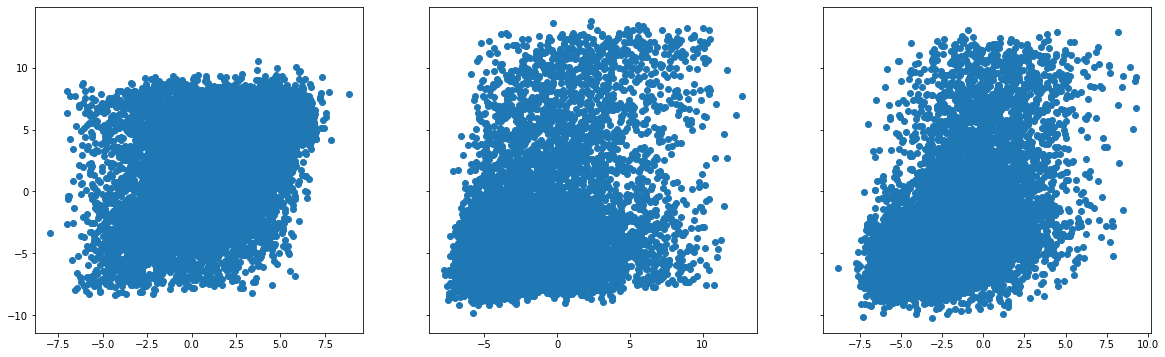

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axs[0].plot(sent_ds['content_neu'], sent_ds['title_neu'], 'o')
axs[1].plot(sent_ds['content_pos'], sent_ds['title_pos'], 'o')
axs[2].plot(sent_ds['content_neg'], sent_ds['title_neg'], 'o')

### Как выглядят проекции тонов новостного фона на плоскость positive и negative?

Text(0.5, 1.0, 'Tesla')

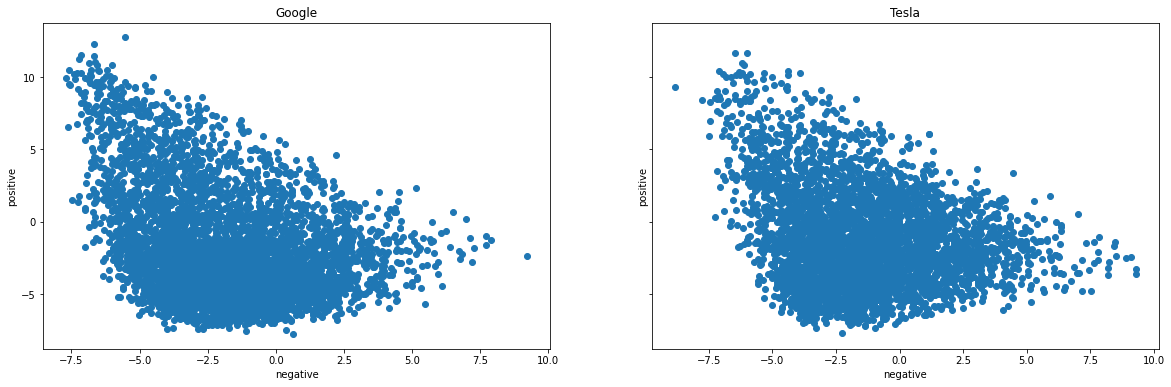

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].plot(google_ds['content_neg'], google_ds['content_pos'], 'o')
axs[0].set_xlabel('negative')
axs[0].set_ylabel('positive')
axs[0].set_title('Google')
axs[1].plot(tesla_ds['content_neg'], tesla_ds['content_pos'], 'o')
axs[1].set_xlabel('negative')
axs[1].set_ylabel('positive')
axs[1].set_title('Tesla')

### Видно, что области, в которых положительные и отрецательные значения тона одновременно принимают большие значения пусты.   

#3) Предобработка данных

In [7]:
class DataFuser():
  def __init__(self, content, price, content_key, price_key):
    self.content = content
    self.price = price
    self.price_key = price_key
    self.content_key = content_key

  def __unite_tabs(self):
    data = []
    for i, d in enumerate(tqdm(self.content[self.content_key])):
      df = self.price[self.price[self.price_key] == d]
      t = {}
      for k in list(df.keys()):
        t[k] = df[k].max()
      data.append(t)

    df = pd.DataFrame(data)
    #df = df.fillna('none')
    df = df.join(self.content)#, lsuffix='_caller', rsuffix='_other')
    df = df.dropna()
    return df

  def fuse(self, columns):
    fused = self.__unite_tabs()
    data = {}
    for c in columns:
      data[c] = fused[c]

    return pd.DataFrame(data)

dfus = DataFuser(google_ds, google_price, 'date', 'Date')
google_data = dfus.fuse(columns=['Date', 'Open', 'Close', 'Volume', 'provider', 'content_neu', 'content_pos', 'content_neg'])

dfus = DataFuser(tesla_ds, tesla_price, 'date', 'Date')
tesla_data = dfus.fuse(columns=['Date', 'Open', 'Close', 'Volume', 'provider', 'content_neu', 'content_pos', 'content_neg'])


100%|██████████| 4251/4251 [00:06<00:00, 652.68it/s]


# Анализ новостных источников

In [ ]:
google_providers = list(set(google_data['provider']))
tesla_providers = list(set(tesla_data['provider']))

goog_pr_dist = {'providers': [], 'count': []}
tsla_pr_dist = {'providers': [], 'count': []}
for p in google_providers:
  df = google_data[google_data['provider'] == p]
  goog_pr_dist['providers'].append(p)
  goog_pr_dist['count'].append(df.shape[0])

for p in tesla_providers:
  df = tesla_data[tesla_data['provider'] == p]
  tsla_pr_dist['providers'].append(p)
  tsla_pr_dist['count'].append(df.shape[0])

goog_pr = pd.DataFrame(goog_pr_dist)
goog_pr = goog_pr.sort_values(by='count', ascending=False)
print(goog_pr[:10], '\n')
print(f"Top 10 Google News providers get {round(goog_pr[:10]['count'].sum() * 100 / google_data.shape[0], 0)}% of all news for {google_data['Date'].min()} - {google_data['Date'].max()} period")
print('\n')
tsla_pr = pd.DataFrame(tsla_pr_dist)
tsla_pr = tsla_pr.sort_values(by='count', ascending=False)
print(tsla_pr[:10], '\n')
print(f"Top 10 Tesla News providers get {round(tsla_pr[:10]['count'].sum() * 100 / tesla_data.shape[0], 0)}% of all news for {tesla_data['Date'].min()} - {tesla_data['Date'].max()} period")

                     providers  count
130                    Reuters   2529
207  Zacks Investment Research    674
209              Seeking Alpha    253
24               Investing.com    208
85                  Cryptovest     83
226              Cointelegraph     57
82                        CNBC     48
163                  Bloomberg     45
186                   Estimize     28
71                  Tim Knight     28 

Top 10 Google News providers get 85.0% of all news for 2011-03-29 - 2020-02-05 period


                        providers  count
113                       Reuters   1421
181     Zacks Investment Research    793
15                  Investing.com    391
183                 Seeking Alpha    190
137                     Bloomberg     93
64                           CNBC     77
158                   MarketWatch     58
126                        iFOREX     49
172              Business Insider     44
115  International Business Times     44 

Top 10 Tesla News providers get 81.0% o

In [ ]:
google_data[google_data['provider'] == 'Zacks Investment Research']

,Date,Open,Close,Volume,provider,content_neu,content_pos,content_neg
19,2020-02-03,1461.650024,1482.599976,3608760.0,Zacks Investment Research,4.554000,-4.158973,-2.790212
21,2020-02-04,1454.489990,1445.410034,4793967.0,Zacks Investment Research,-2.227953,3.481942,-2.262756
26,2020-02-05,1463.609985,1446.050049,1818793.0,Zacks Investment Research,-4.761300,8.183684,-5.524301
32,2020-02-03,1461.650024,1482.599976,3608760.0,Zacks Investment Research,-4.406865,6.970464,-3.994127
34,2020-02-03,1461.650024,1482.599976,3608760.0,Zacks Investment Research,-4.711156,7.247416,-4.641571
...,...,...,...,...,...,...,...,...
4253,2014-04-25,532.299988,523.099976,2372604.0,Zacks Investment Research,-4.307035,7.646459,-5.555768
4273,2014-03-19,606.487061,600.180969,3222679.0,Zacks Investment Research,0.912067,0.638377,-4.609030
4337,2013-11-21,513.997559,517.550964,1092497.0,Zacks Investment Research,1.476428,1.305111,-5.960928
4358,2013-10-02,441.777649,444.430206,1496334.0,Zacks Investment Research,2.666630,-0.649906,-4.151942


# Анализ распределений

(array([ 10.,   4.,   2.,   5.,   2.,  11.,   4.,   2.,   0.,   6.,   3.,
          2.,  24., 155., 179., 226., 264., 150., 203., 175., 209., 197.,
        313., 338., 248., 289., 311., 133., 110.,  19.,  16.,  22.,  35.,
         15.,   8.,  21.,  17.,  12.,   0.,  16.,  28.,  13.,  13.,  27.,
         28.,   0.,   0.,   0.,   0.,  32.]),
 array([ 27.73999977,  40.00139973,  52.26279968,  64.52419964,
         76.78559959,  89.04699955, 101.30839951, 113.56979946,
        125.83119942, 138.09259937, 150.35399933, 162.61539928,
        174.87679924, 187.1381992 , 199.39959915, 211.66099911,
        223.92239906, 236.18379902, 248.44519897, 260.70659893,
        272.96799889, 285.22939884, 297.4907988 , 309.75219875,
        322.01359871, 334.27499866, 346.53639862, 358.79779858,
        371.05919853, 383.32059849, 395.58199844, 407.8433984 ,
        420.10479836, 432.36619831, 444.62759827, 456.88899822,
        469.15039818, 481.41179813, 493.67319809, 505.93459805,
        518.195998

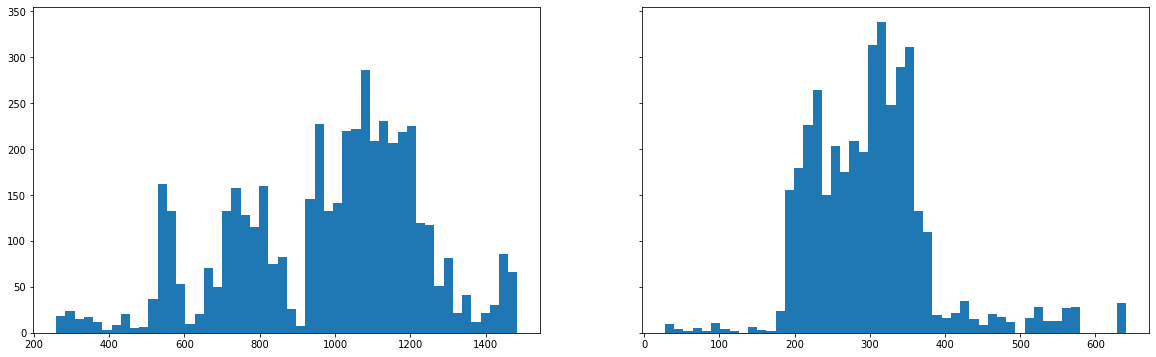

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_data['Close'], bins=50)
axs[1].hist(tesla_data['Close'], bins=50)

(array([  7.,   4.,  45.,  91., 157., 262., 340., 291., 331., 339., 269.,
        202., 170., 149., 132., 109.,  66.,  84.,  67.,  78.,  41.,  22.,
         36., 102.,  34., 109.,  35.,   6.,  21.,  29.,  38.,  49.,   3.,
         21.,   0.,  25.,   5.,   1.,  16.,  45.,  16.,  20.,  16.,   0.,
          0.,  12.,   0.,   0.,   0.,   2.]),
 array([       0.  ,   743277.96,  1486555.92,  2229833.88,  2973111.84,
         3716389.8 ,  4459667.76,  5202945.72,  5946223.68,  6689501.64,
         7432779.6 ,  8176057.56,  8919335.52,  9662613.48, 10405891.44,
        11149169.4 , 11892447.36, 12635725.32, 13379003.28, 14122281.24,
        14865559.2 , 15608837.16, 16352115.12, 17095393.08, 17838671.04,
        18581949.  , 19325226.96, 20068504.92, 20811782.88, 21555060.84,
        22298338.8 , 23041616.76, 23784894.72, 24528172.68, 25271450.64,
        26014728.6 , 26758006.56, 27501284.52, 28244562.48, 28987840.44,
        29731118.4 , 30474396.36, 31217674.32, 31960952.28, 32704230.24,
 

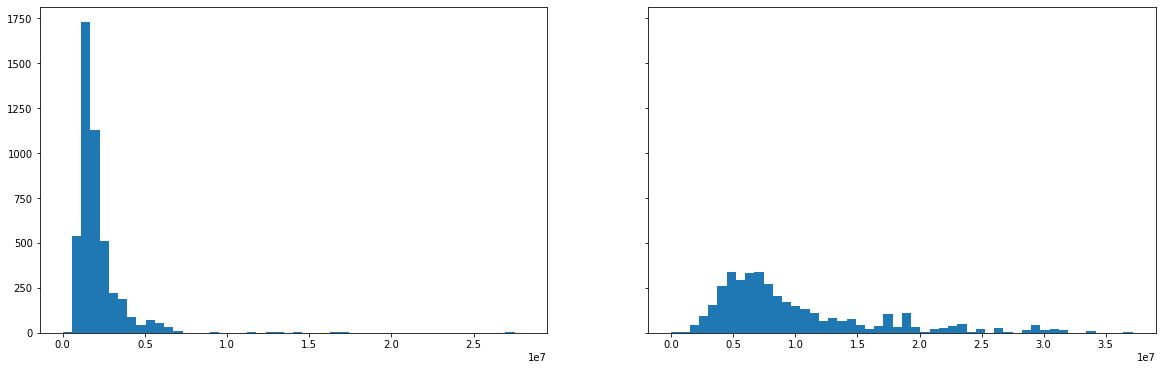

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_data['Volume'], bins=50)
axs[1].hist(tesla_data['Volume'], bins=50)

### из распределений цен бумаг google и tesla видно, что это не стационарные временные ряды. 

Text(0.5, 1.0, 'Tesla positives')

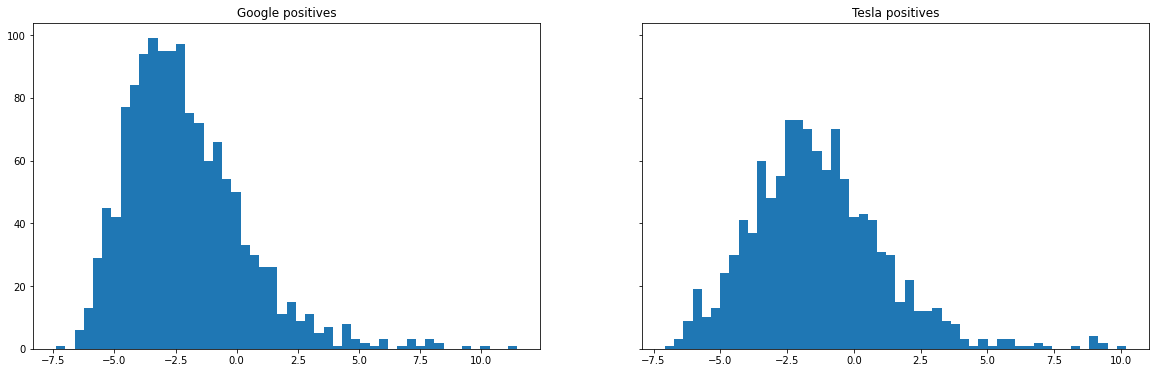

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_data['content_pos'], bins=50)
axs[1].hist(tesla_data['content_pos'], bins=50)
axs[0].set_title('Google positives')
axs[1].set_title('Tesla positives')

Text(0.5, 1.0, 'Tesla negatives')

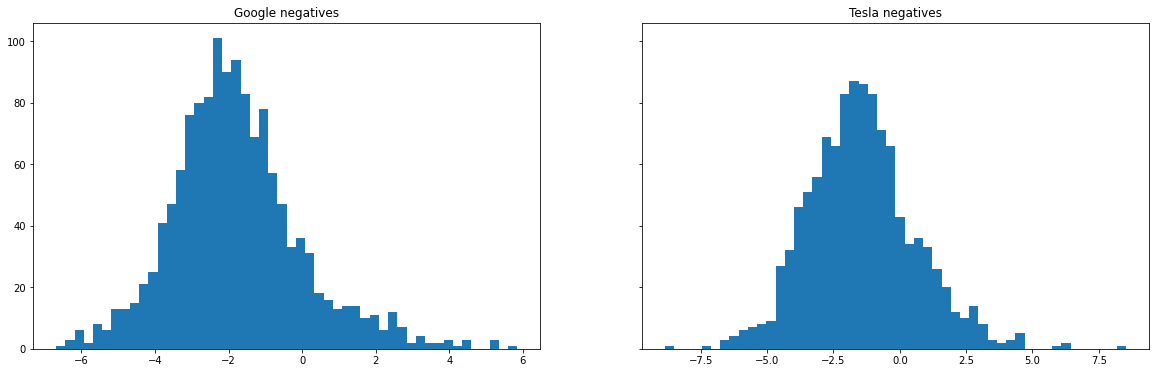

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_data['content_neg'], bins=50)
axs[1].hist(tesla_data['content_neg'], bins=50)
axs[0].set_title('Google negatives')
axs[1].set_title('Tesla negatives')

Text(0.5, 1.0, 'Tesla neutrals')

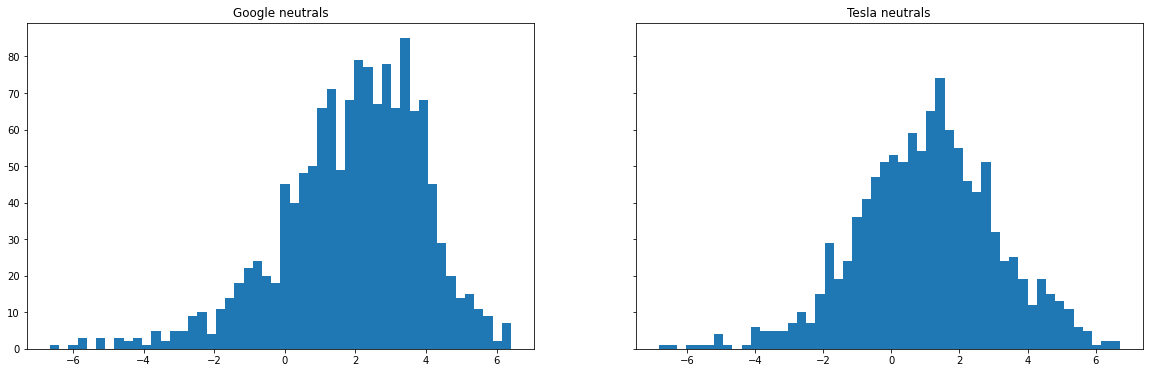

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_data['content_neu'], bins=50)
axs[1].hist(tesla_data['content_neu'], bins=50)
axs[0].set_title('Google neutrals')
axs[1].set_title('Tesla neutrals')

In [ ]:
google_data

,Date,Open,Close,Volume,provider,content_neu,content_pos,content_neg
0,2020-02-05,1463.609985,1446.050049,1818793.0,Reuters,4.836923,-5.091402,-2.580488
1,2020-02-05,1463.609985,1446.050049,1818793.0,Reuters,2.838582,-1.732226,-3.407188
2,2020-02-05,1463.609985,1446.050049,1818793.0,The Motley Fool,1.478745,0.205971,-3.751143
3,2020-02-05,1463.609985,1446.050049,1818793.0,CNBC,2.748129,-3.999480,-1.637710
4,2020-02-05,1463.609985,1446.050049,1818793.0,247wallst,-2.012737,3.360972,-2.688910
...,...,...,...,...,...,...,...,...
5085,2011-04-04,296.787292,294.124725,4105655.0,Reuters,1.855099,-2.278589,-0.910954
5089,2011-03-29,288.279053,291.146820,3207168.0,Reuters,-2.500452,2.331399,-0.617498
5090,2011-03-29,288.279053,291.146820,3207168.0,Reuters,-1.493635,0.963192,-0.416011
5091,2011-03-29,288.279053,291.146820,3207168.0,Reuters,-1.780186,1.298086,-0.580713


#4) Генератор датасета для моделирования

* В качестве моделируемой случайной величины возьмем изменения цены акции в будующем относительно настоящего на растоянии 1 до 30 дней.
* В качестве признаков будем исследовать средние значения новостного фона в прошлом на расстоянии 10 до 90 дней


In [23]:
class datatransform():
  def __init__(self, tab):
    self.data = tab
  
  def add_returns(self):
    returns = pd.DataFrame([(close - open) / open for open, close in zip(self.data['Open'], self.data['Close'])],
                        columns=['returns'])
    self.data = self.data.join(returns)
    return self.data

  def group_by_day(self, key):
    self.data = self.data.groupby(key).agg('mean')
    self.data = self.data.reset_index()
    return self.data

  def add_dist_returns(self, dist=10):
    returns = []
    for i in range(self.data['Close'].size):
      if i + dist < self.data['Close'].size:
        returns.append((self.data['Close'].loc[i + dist] - self.data['Close'].loc[i]) / self.data['Close'].loc[i])
    self.data = self.data.join(pd.DataFrame({f'returns_{dist}': returns}))
    self.data = self.data.dropna()
    return self.data

  def add_MA_sentiment(self, dist=30):
    self.data['neu_ma'] = self.data['content_neu'].rolling(window=dist).mean()
    self.data['neg_ma'] = self.data['content_neg'].rolling(window=dist).mean()
    self.data['pos_ma'] = self.data['content_pos'].rolling(window=dist).mean()

  def get_dataset(self, hist_days=30, price_days=10):
    self.group_by_day('Date')
    self.add_returns()
    self.add_MA_sentiment(hist_days)
    self.add_dist_returns(price_days)

    #print(self.data)

    x_data, y_data = shuffle(self.data.values[:, 8:11], self.data.values[:, 11], random_state=1)

    clf_data = []
    for y in y_data:
      if y > 0:
        clf_data.append(1)
      else:
        clf_data.append(0)

    x_train, x_test = x_data[:len(x_data) // 2], x_data[len(x_data) // 2 :] 
    y_train, y_test = clf_data[:len(y_data) // 2], clf_data[len(y_data) // 2 :]
    return x_train, x_test, y_train, y_test

  def get_regress_dataset(self, hist_days=30, price_days=10):
    self.group_by_day('Date')
    self.add_returns()
    self.add_MA_sentiment(hist_days)
    self.add_dist_returns(price_days)

    #print(self.data)

    x_data, y_data = shuffle(self.data.values[:, 8:11], self.data.values[:, 11], random_state=1)

    x_train, x_test = x_data[:len(x_data) // 2], x_data[len(x_data) // 2 :] 
    y_train, y_test = y_data[:len(y_data) // 2], y_data[len(y_data) // 2 :]
    return x_train, x_test, y_train, y_test




dtr = datatransform(google_data)
dtr.group_by_day('Date')
dtr.add_returns()
dtr.add_MA_sentiment(dist=60)
google_d = dtr.add_dist_returns(20)

dtr = datatransform(tesla_data)
dtr.group_by_day('Date')
dtr.add_returns()
dtr.add_MA_sentiment(dist=60)
tesla_d = dtr.add_dist_returns(20)

In [ ]:
google_d

,Date,Open,Close,Volume,content_neu,content_pos,content_neg,returns,neu_ma,neg_ma,pos_ma,returns_10
59,2013-03-05,414.851562,419.706268,4045034.0,3.284384,-3.600313,-1.712909,0.011702,0.452029,-1.132746,-1.033898,0.085977
60,2013-03-06,421.407928,416.102783,2873997.0,1.369816,-2.648352,-0.838949,-0.012589,0.506939,-1.137761,-1.103552,0.078422
61,2013-03-13,414.351105,413.049835,1641413.0,0.377021,0.542621,-2.888074,-0.003140,0.453581,-1.189009,-1.014650,0.103477
62,2013-04-09,388.125702,389.226776,2157927.0,0.323413,-1.728746,-0.176193,0.002837,0.428053,-1.176762,-1.005486,0.160987
63,2013-04-30,409.896790,412.699493,2306836.0,3.304799,-4.492898,-2.238417,0.006838,0.477366,-1.232934,-1.050169,0.080403
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,2020-01-15,1433.020020,1439.199951,1077519.0,1.269217,-0.772246,-2.565648,0.004313,2.157047,-2.012481,-2.345492,0.010457
1344,2020-01-16,1445.449951,1450.160034,1304040.0,2.562843,-2.333159,-3.089330,0.003259,2.212494,-2.039738,-2.403468,-0.011985
1345,2020-01-17,1462.540039,1479.520020,2621175.0,0.158970,-0.631209,-1.337503,0.011610,2.144932,-2.013288,-2.350841,0.002082
1346,2020-01-21,1479.000000,1482.250000,2446601.0,2.890749,-3.165023,-2.689399,0.002197,2.153085,-1.997201,-2.375201,-0.024854


Text(0.5, 1.0, 'Tesla')

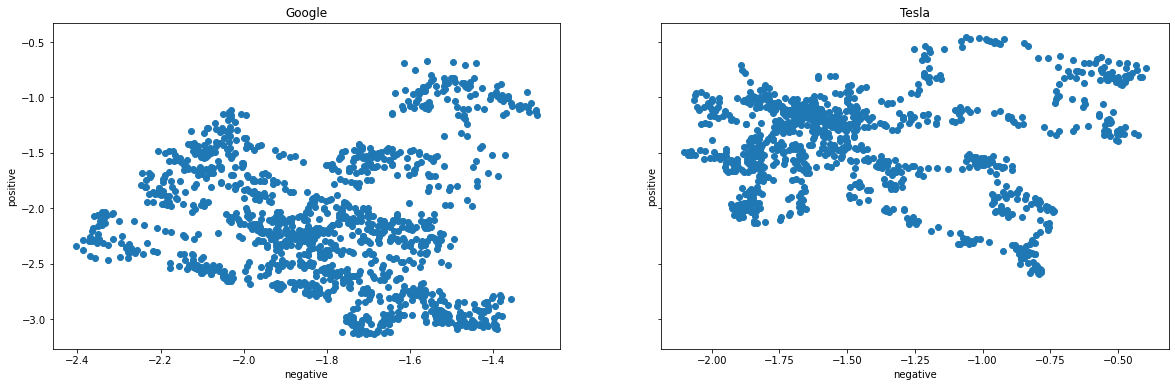

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].plot(google_d['neg_ma'], google_d['pos_ma'], 'o')
axs[0].set_xlabel('negative')
axs[0].set_ylabel('positive')
axs[0].set_title('Google')
axs[1].plot(tesla_d['neg_ma'], tesla_d['pos_ma'], 'o')
axs[1].set_xlabel('negative')
axs[1].set_ylabel('positive')
axs[1].set_title('Tesla')

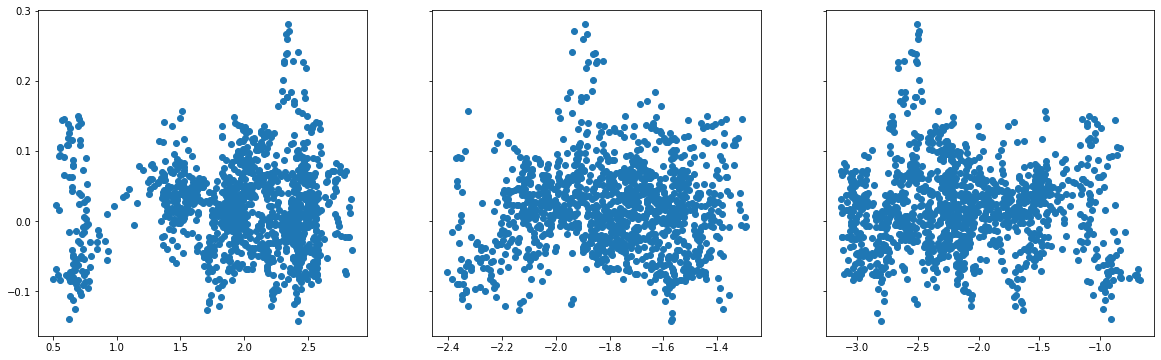

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axs[0].scatter(google_d['neu_ma'], google_d['returns_20'])
axs[1].scatter(google_d['neg_ma'], google_d['returns_20'])
axs[2].scatter(google_d['pos_ma'], google_d['returns_20'])

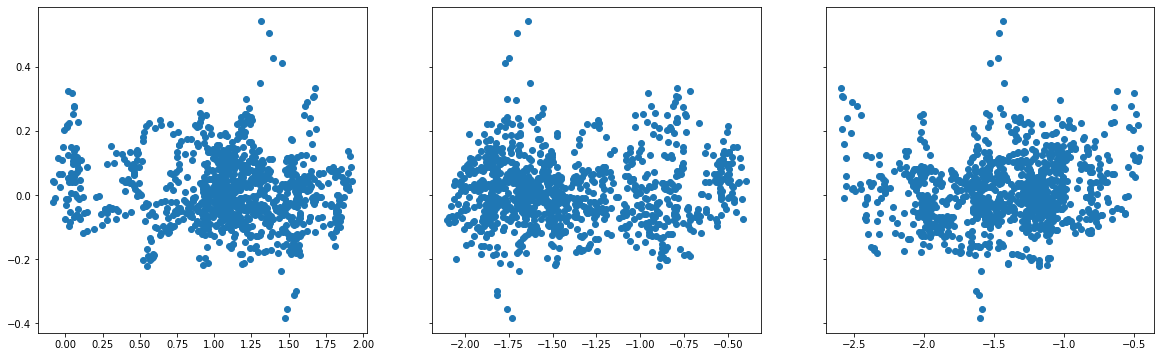

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axs[0].scatter(tesla_d['neu_ma'], tesla_d['returns_10'])
axs[1].scatter(tesla_d['neg_ma'], tesla_d['returns_10'])
axs[2].scatter(tesla_d['pos_ma'], tesla_d['returns_10'])

Text(0.5, 1.0, 'Tesla returns')

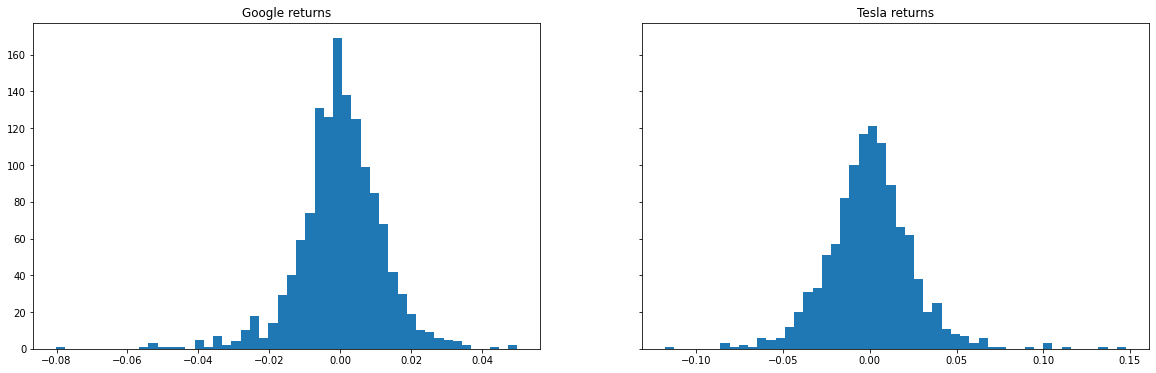

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_d['returns'], bins=50)
axs[1].hist(tesla_d['returns'], bins=50)
axs[0].set_title('Google returns')
axs[1].set_title('Tesla returns')

Распределения дневного изменения цен на бумаги выглядят стационарными

Text(0.5, 1.0, 'Tesla returns_10')

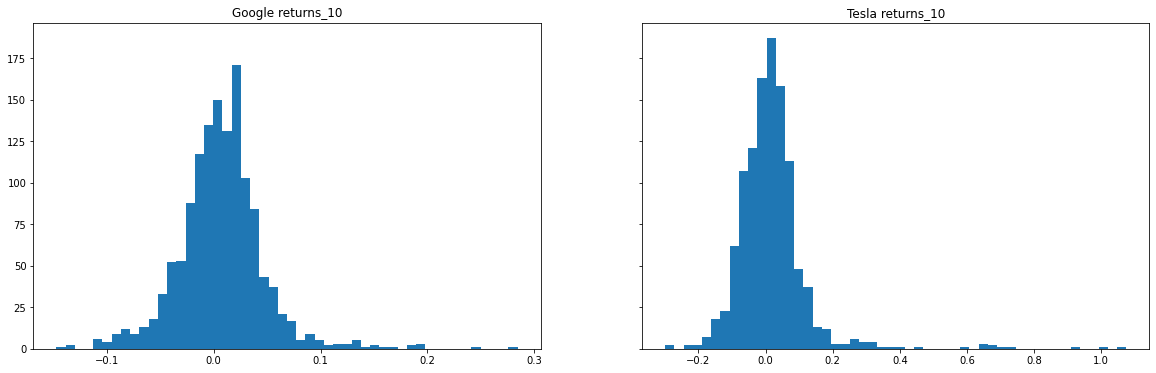

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(google_d['returns_10'], bins=50)
axs[1].hist(tesla_d['returns_10'], bins=50)
axs[0].set_title('Google returns_10')
axs[1].set_title('Tesla returns_10')

Распределения 10 дневного изменения цен на бумаги, также выглядят стационарными, но уже более ассиметричными по сравнению с дневными

### Визуализация данных с целью поиска возможных простых корреляций

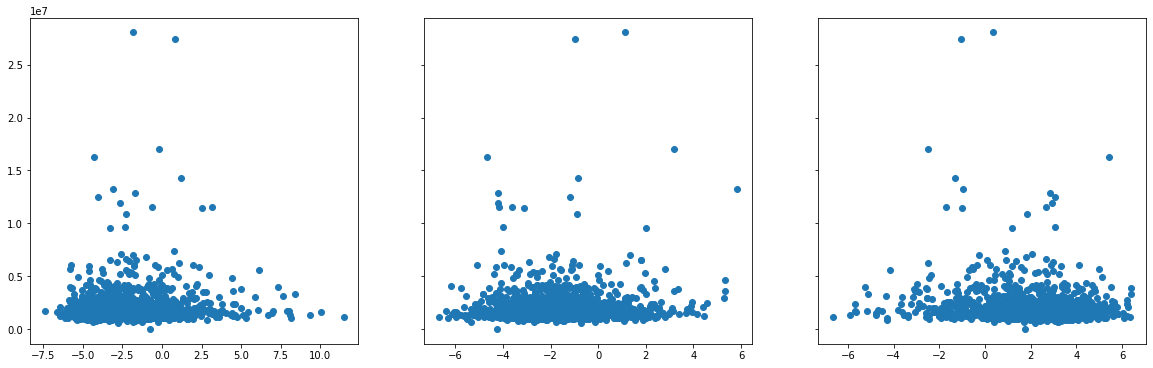

In [ ]:
x_pos, x_neg, x_neu, y, x_ret, y_close, y_ret, x_open = [], [], [], [], [], [], [], []
for i in range(google_data['Volume'].size - 10):
  x_pos.append(google_data['content_pos'].loc[i])
  x_neg.append(google_data['content_neg'].loc[i])
  x_neu.append(google_data['content_neu'].loc[i])
  x_open.append(google_data['Open'].loc[i])
  y.append(google_data['Volume'].loc[i + 2])
  y_close.append(google_data['Close'].loc[i + 9])
  y_ret.append(google_data['returns'].loc[i + 2])
  x_ret.append(google_data['returns'].loc[i])


fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axs[0].plot(x_pos, y, 'o')
axs[1].plot(x_neg, y, 'o')
axs[2].plot(x_neu, y, 'o')
#axs[3].plot(x_ret, y_close, 'o')


Корреляций между отдельными компонентами тона и будущими однодневными изменениями цен не обнаружено

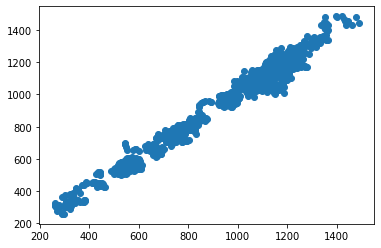

In [ ]:
plt.plot(x_open, y_close, 'o')

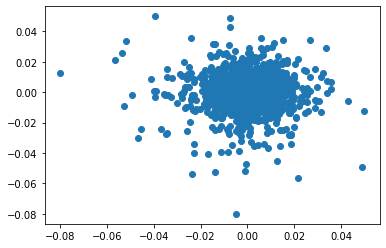

In [ ]:
plt.plot(x_ret, y_ret, 'o')

Корреляций между отдельными компонентами тона и будущими однодневными изменениями цен не обнаружено

(array([ 1.,  4.,  4., 11., 17., 31., 23., 41., 33., 24., 12., 10.,  3.,
         5.,  2.,  4.,  2.,  0.,  0.,  1.]),
 array([-5.618493  , -5.11709957, -4.61570613, -4.11431269, -3.61291926,
        -3.11152583, -2.61013239, -2.10873895, -1.60734552, -1.10595209,
        -0.60455865, -0.10316521,  0.39822822,  0.89962165,  1.40101509,
         1.90240853,  2.40380196,  2.9051954 ,  3.40658883,  3.90798227,
         4.4093757 ]),
 <a list of 20 Patch objects>)

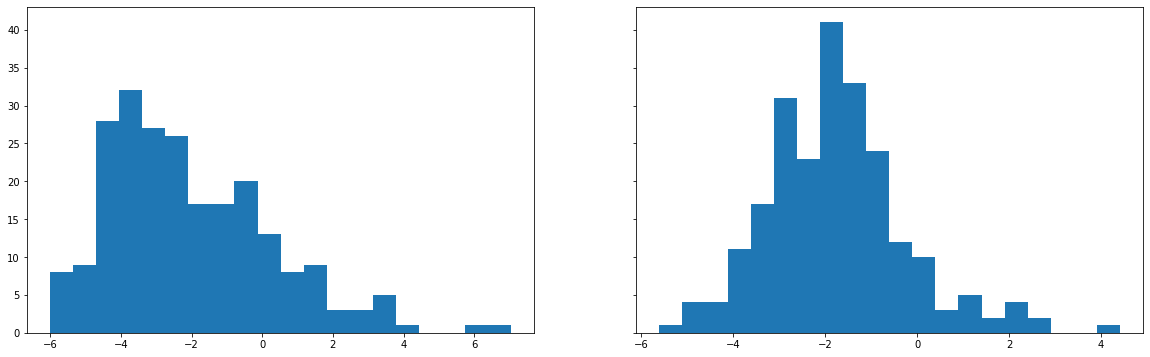

In [ ]:
up_ret = google_data[google_data['returns'] > 0.01]

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].hist(up_ret['content_pos'], bins=20)
axs[1].hist(up_ret['content_neg'], bins=20)

#5) Построение модели регрессии на основе дерева решений

In [25]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_regress_dataset(hist_days=60, price_days=10)

regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
regressor = regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print(f"Коэффициент детерминации: {metrics.r2_score(y_test, regressor.predict(x_test), multioutput='variance_weighted')}")

Коэффициент детерминации: -0.07005731370033041


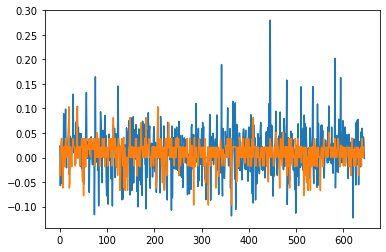

In [24]:
plt.plot(range(len(y_test)), y_test, '-')
plt.plot(range(len(y_test)), regressor.predict(x_test), '-')

Из полученных данных видно, что корреляция в задаче регрессии между исследуемыми признаками новостного фона и будующим изменением цены отсутствует

Построение модели на датасете компании google

In [ ]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=10)

clf = LogisticRegression(solver='liblinear', random_state=0)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_tr = clf.predict(x_train)

print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred)) 

print(classification_report(y_test, clf.predict(x_test)))

0.5
0.6248062015503876
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.62      1.00      0.77       403

    accuracy                           0.62       645
   macro avg       0.31      0.50      0.38       645
weighted avg       0.39      0.62      0.48       645



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def LR_model(data, max_depth=5, hist_days=60, price_days=10):
  dtr = datatransform(data)
  x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=hist_days, price_days=price_days)
  #print(dtr.data)
  clf = LogisticRegression(solver='liblinear', random_state=0)
  clf = clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  return metrics.balanced_accuracy_score(y_test, y_pred)

#6) Линейная логистическая регрессия

### Анализ влияния входных параметров на точность моделирования линейной логистической регрессии

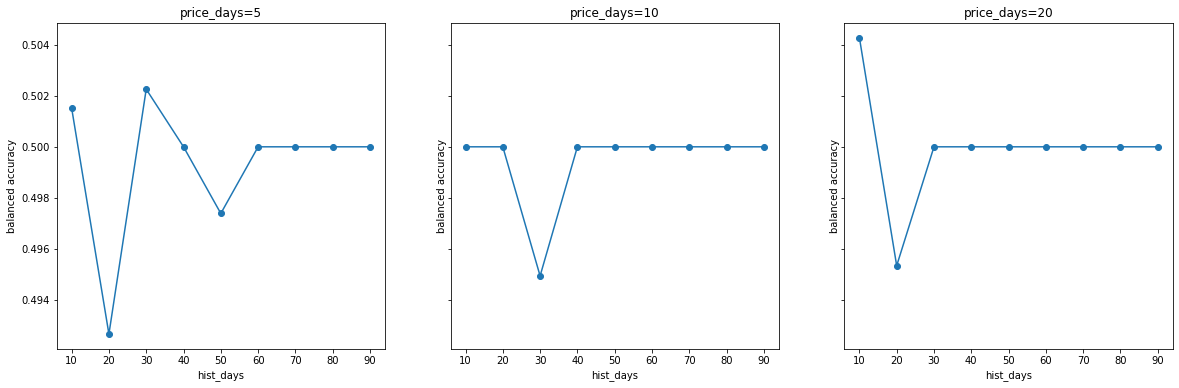

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(LR_model(google_data, max_depth=8, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

Линейная логистическая регрессия также не выявила связи между входными и выходными признаками

#7) Классификационная модель Дерево решений

#### Построение модели на датасете компании google

In [ ]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=20)
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  

print(classification_report(y_test, clf.predict(x_test)))

0.6853345233162274
0.725
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       229
           1       0.77      0.82      0.79       411

    accuracy                           0.73       640
   macro avg       0.70      0.69      0.69       640
weighted avg       0.72      0.72      0.72       640



### Анализ влияния входных параметров на точность моделирования дерева решений

In [ ]:
def DT_model(data, max_depth=5, hist_days=60, price_days=10):
  dtr = datatransform(data)
  x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=hist_days, price_days=price_days)
  #print(dtr.data)
  clf = DecisionTreeClassifier(max_depth = max_depth)
  clf = clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  return metrics.balanced_accuracy_score(y_test, y_pred)


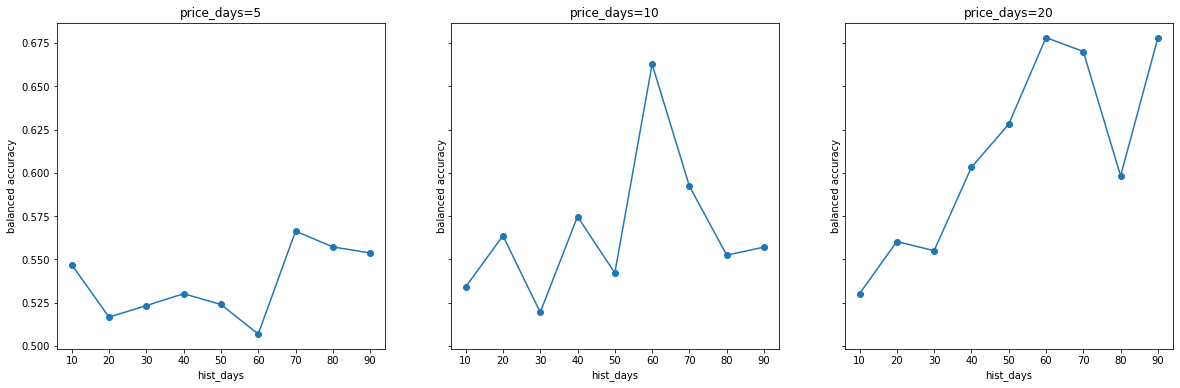

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(DT_model(google_data, max_depth=8, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')


Классификационная модель на основе дерева решений выявила корреляцию в задаче бинарной классификации.
В качестве выходных классов рассматривались 2 случая, что цена акции через х дней будет выше или ниже сегодняшней.

Из полученных данных видно, что с увеличением длинны исторического хвоста новостного фона выявляется тенденция к увеличению точности модели.
Также видно что модель выдает более точные долгосрочные прогнозы.

При этом можно видеть локальные максимумы на интервале 50 - 60 дней 

### Построение модели на датасете компании Tesla

In [ ]:
dtr = datatransform(tesla_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=10)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_tr = clf.predict(x_train)
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, clf.predict(x_test)))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523

    accuracy                           1.00       523
   macro avg       1.00      1.00      1.00       523
weighted avg       1.00      1.00      1.00       523



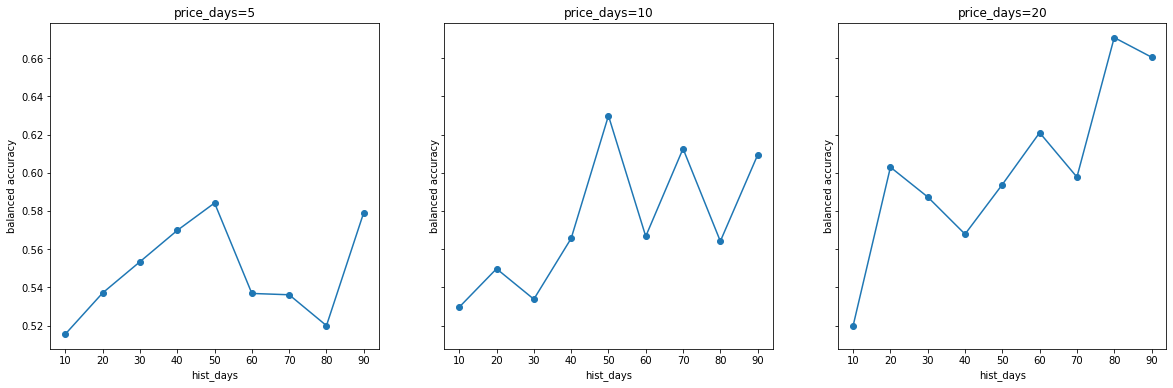

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(DT_model(tesla_data, max_depth=8, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

Из полученных данных видно, что с увеличением длинны исторического хвоста новостного фона выявляется тенденция к увеличению точности модели.
Также видно что модель выдает более точные долгосрочные прогнозы.

При этом можно видеть локальные максимумы на интервале 40 - 50 дней

#8) Классификационная модель случайный лес


In [ ]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=10)
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_tr = clf.predict(x_train)
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  

print(classification_report(y_test, clf.predict(x_test)))

0.5834136537948855
0.6527131782945736
              precision    recall  f1-score   support

           0       0.57      0.31      0.40       242
           1       0.67      0.86      0.76       403

    accuracy                           0.65       645
   macro avg       0.62      0.58      0.58       645
weighted avg       0.63      0.65      0.62       645



RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [ ]:
def RF_model(data, max_depth=5, hist_days=60, price_days=10):
  dtr = datatransform(data)
  x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=hist_days, price_days=price_days)
  #print(dtr.data)
  clf = RandomForestClassifier(max_depth=max_depth, n_estimators=10, max_features=1)
  clf = clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  return metrics.balanced_accuracy_score(y_test, y_pred)

### Анализ влияния входных параметров на точность моделирования случайного леса

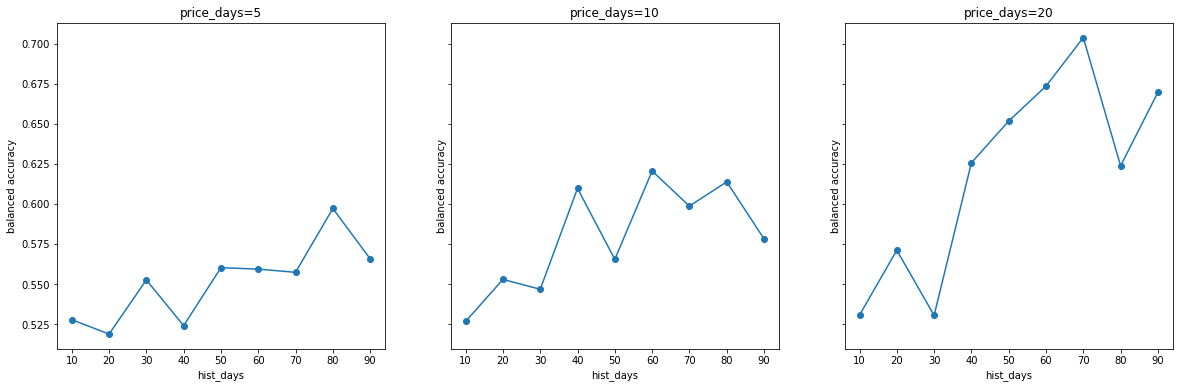

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(RF_model(google_data, max_depth=8, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

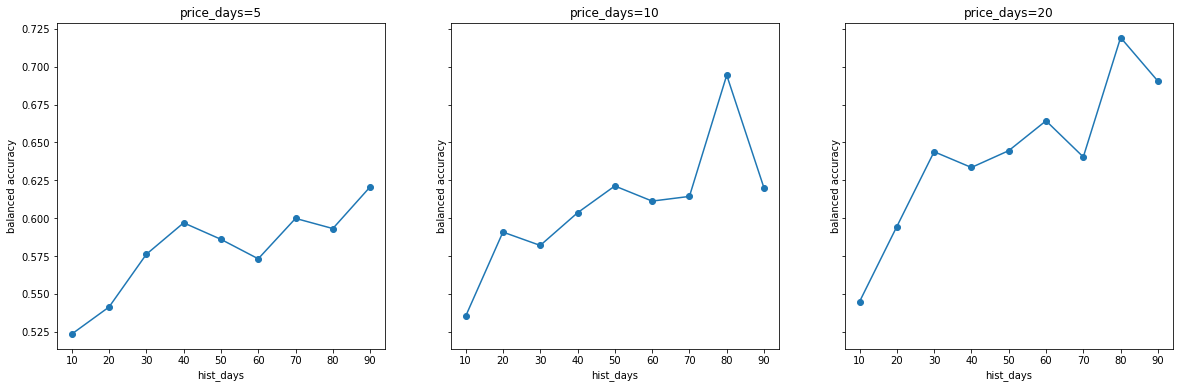

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(RF_model(tesla_data, max_depth=8, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

#9) Классификатор наивный Байес

In [ ]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=10)
clf = GaussianNB()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_tr = clf.predict(x_train)
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  

print(classification_report(y_test, clf.predict(x_test)))

0.5169031847917478
0.6139534883720931
              precision    recall  f1-score   support

           0       0.45      0.13      0.20       242
           1       0.63      0.91      0.75       403

    accuracy                           0.61       645
   macro avg       0.54      0.52      0.47       645
weighted avg       0.56      0.61      0.54       645



RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [ ]:
def NB_model(data, hist_days=60, price_days=10):
  dtr = datatransform(data)
  x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=hist_days, price_days=price_days)
  #print(dtr.data)
  clf = GaussianNB()
  clf = clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  return metrics.balanced_accuracy_score(y_test, y_pred)

### Анализ влияния входных параметров на точность моделирования наивного Байеса

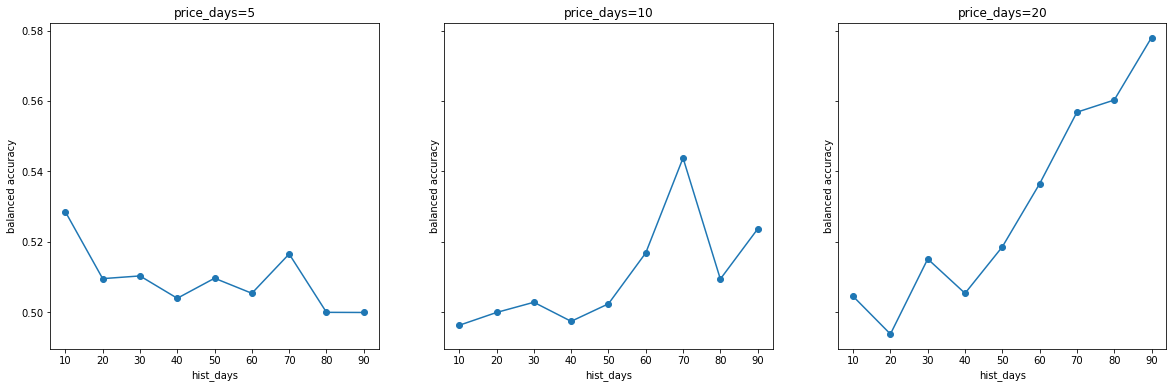

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(NB_model(google_data, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

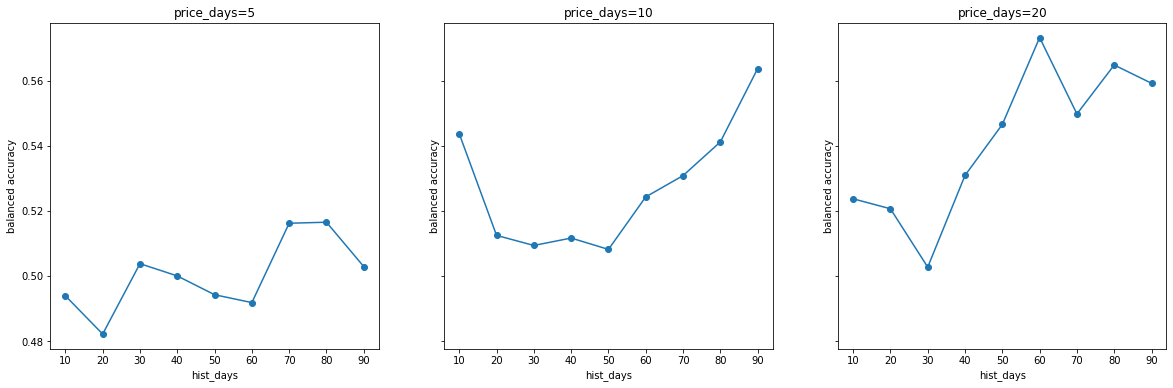

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

x = [i for i in range(10, 100, 10)]

for i, price_days in enumerate([5, 10, 20]):
  y = []
  for hist_days in x:
    y.append(NB_model(tesla_data, hist_days=hist_days, price_days=price_days))

  axs[i].plot(x, y, 'o-')
  axs[i].set_xlabel('hist_days')
  axs[i].set_ylabel('balanced accuracy')
  axs[i].set_title(f'price_days={price_days}')

#10) Квадратичный дискриминантный анализ

In [ ]:
dtr = datatransform(google_data)
x_train, x_test, y_train, y_test = dtr.get_dataset(hist_days=60, price_days=10)
clf = QuadraticDiscriminantAnalysis()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_tr = clf.predict(x_train)
print(metrics.balanced_accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  

print(classification_report(y_test, clf.predict(x_test)))

0.5268031089145458
0.6108527131782946
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       242
           1       0.64      0.86      0.73       403

    accuracy                           0.61       645
   macro avg       0.55      0.53      0.50       645
weighted avg       0.57      0.61      0.56       645



#11) Выводы:

В данной работе проводили анализ влияния новостного фона на изменение цен акций компаний Google и Tesla.

Для анализа строили модели регрессии и бинарной классификации с помощью разных алгоритмов.

* В качестве моделируемой случайной величины исследовали изменения цены акции в будующем относительно настоящего на растоянии 1 до 30 дней.
* В качестве признаков брали средние значения новостного фона в прошлом на расстоянии 10 до 90 дней


Основные результаты моделирования:

* Корреляция в задаче регрессии между исследуемыми признаками новостного фона и будующим изменением цены отсутствует, как было показано выше.
* Линейная логистическая регрессия также не выявила связи между входными и выходными признаками
* Классификационная модель на основе дерева решений выявила корреляцию в задаче бинарной классификации на данных по акциям GOOGL.
Было показано, что с увеличением длинны исторического хвоста новостного фона выявляется тенденция к увеличению точности модели.
Также видно что модель выдает более точные долгосрочные прогнозы.
При этом можно видеть локальные максимумы на интервале 50 - 60 дней
* Классификационная модель на основе дерева решений выявила корреляцию в задаче бинарной классификации на данных по акциям TSLA. Показано, что с увеличением длинны исторического хвоста новостного фона выявляется тенденция к увеличению точности модели.
Также видно что модель выдает более точные долгосрочные прогнозы. При этом можно видеть локальные максимумы на интервале 40 - 50 дней
* В работе проведено сравнение результатов моделирования на моделях, полученных с помощью алгоритмов: линейной логистической регрессии, классификации на основе дерева решений, случайного леса и "наивного Байеса".
Показано, что наиболее точные модели прогнозирующие изменение цен акций GOOGL и TSLA получены на основе алгоритмов дерева решений и случайного леса.
Точность прогнозирования для этих моделей, характеризуемая параметром balanced_accuracy, достигала 70%.